In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from string import punctuation
from tensorflow.keras import layers, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rdxda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


df = pd.read_csv('dataset.csv')
df.head()

In [5]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text = ''.join(char for char in text if char not in punctuation)


    text = ''.join(char for char in text if not char.isdigit())

    words = word_tokenize(text)


    stemmer = PorterStemmer()

    stemmed_words = [stemmer.stem(word) for word in words]


    preprocessed_text = ' '.join(stemmed_words)

    return preprocessed_text

In [6]:
    df['preprocessed_text'] = df['Text'].apply(preprocess_text)
    df['preprocessed_text'].head()

0    natur in the broadest sens is the natur physic...
1    natur can refer to the phenomena of the physic...
2    the studi of natur is a larg if not the onli p...
3    although human are part of natur human activ i...
4    the word natur is borrow from the old french n...
Name: preprocessed_text, dtype: object

In [7]:
text = df['preprocessed_text']
language = df['Language']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text, language, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
label_encoder = LabelEncoder()

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

y_train_v = label_encoder.fit_transform(y_train)
y_test_v = label_encoder.transform(y_test)

print("Training set - Text shape:", X_train_v.shape)
print("Testing set - Text shape:", X_test_v.shape)



Training set - Text shape: (8269, 31507)
Testing set - Text shape: (2068, 31507)


In [9]:
vectorizer = CountVectorizer()
label_encoder = LabelEncoder()

text_v = vectorizer.fit_transform(text)
language_v = label_encoder.fit_transform(language)

Accuracy: 0.980174081237911


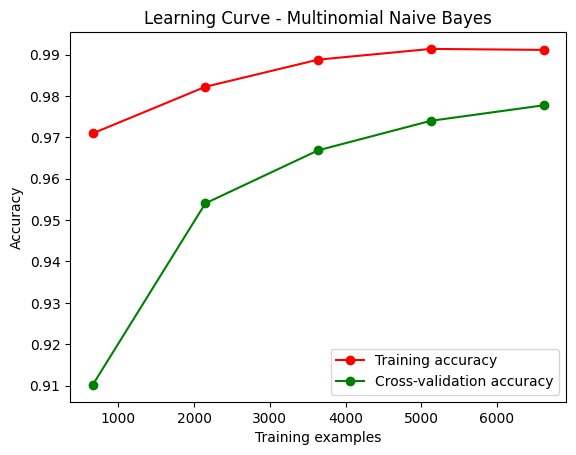

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

model = MultinomialNB()
model.fit(X_train_v, y_train_v)

y_pred = model.predict(X_test_v)

y_pred_labels = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

train_sizes, train_scores, test_scores = learning_curve(model, X_train_v, y_train_v, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve - Multinomial Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")
plt.legend(loc="best")
plt.show()


In [11]:
def language_detector(input_xlanguage):

    input_xlanguage_v = vectorizer.transform([input_xlanguage])

    language_detected = (model.predict(input_xlanguage_v)[0])

    return language_detected

In [16]:
def predict(input_text):

    predicted_language = label_encoder.inverse_transform((language_detector(input_text)).reshape(-1))
    print(f"The predicted language is: {predicted_language}")

predict("Привет, это тест")
predict("we are boys")
predict("انا مصري ")
predict("mon petit.")

ValueError: X has 36164 features, but MultinomialNB is expecting 31507 features as input.

**ANN**



Epoch 1/10


78/78 [==============================] - 6s 46ms/step - loss: 2.2297 - accuracy: 0.3836 - val_loss: 1.2852 - val_accuracy: 0.8543
Epoch 2/10
78/78 [==============================] - 3s 42ms/step - loss: 0.9928 - accuracy: 0.7990 - val_loss: 0.5206 - val_accuracy: 0.9589
Epoch 3/10
78/78 [==============================] - 3s 42ms/step - loss: 0.5354 - accuracy: 0.8978 - val_loss: 0.3210 - val_accuracy: 0.9692
Epoch 4/10
78/78 [==============================] - 3s 41ms/step - loss: 0.3311 - accuracy: 0.9411 - val_loss: 0.2369 - val_accuracy: 0.9716
Epoch 5/10
78/78 [==============================] - 3s 41ms/step - loss: 0.2615 - accuracy: 0.9518 - val_loss: 0.1965 - val_accuracy: 0.9704
Epoch 6/10
78/78 [==============================] - 3s 41ms/step - loss: 0.1853 - accuracy: 0.9688 - val_loss: 0.1716 - val_accuracy: 0.9734
Epoch 7/10
78/78 [==============================] - 3s 43ms/step - loss: 0.1476 - accuracy: 0.9712 - val_loss: 0.1572 - val_accuracy: 0.9752
Epoch 8/1

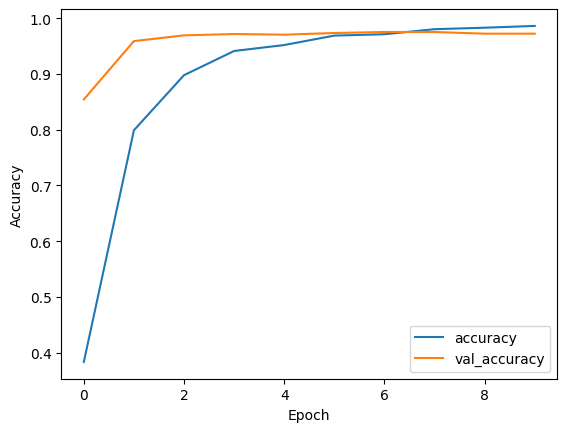

52/52 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9716
Test Accuracy (ANN): 0.9715840220451355


In [13]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_v, y_train_v, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

def sort_indices(sparse_matrix):
    coo_matrix = sparse_matrix.tocoo()
    sorted_indices = np.argsort(coo_matrix.col)
    sorted_data = coo_matrix.data[sorted_indices]
    sorted_row = coo_matrix.row[sorted_indices]
    sorted_col = coo_matrix.col[sorted_indices]
    sorted_matrix = sparse_matrix.__class__((sorted_data, (sorted_row, sorted_col)), shape=coo_matrix.shape)
    return sorted_matrix


X_train_sorted = sort_indices(X_train_temp)
X_val_sorted = sort_indices(X_val)
X_test_sorted = sort_indices(X_test)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ann.fit(X_train_sorted, y_train_temp, epochs=10, batch_size=64, validation_data=(X_val_sorted, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model_ann.evaluate(X_test_sorted, y_test)
print("Test Accuracy (ANN):", test_accuracy)



Epoch 1/20
78/78 [==============================] - 2s 19ms/step - loss: 1.6661 - accuracy: 0.5269 - val_loss: 0.6946 - val_accuracy: 0.8779
Epoch 2/20
78/78 [==============================] - 1s 15ms/step - loss: 0.6909 - accuracy: 0.8188 - val_loss: 0.3770 - val_accuracy: 0.9190
Epoch 3/20
78/78 [==============================] - 1s 14ms/step - loss: 0.4465 - accuracy: 0.8893 - val_loss: 0.2864 - val_accuracy: 0.9335
Epoch 4/20
78/78 [==============================] - 1s 13ms/step - loss: 0.2861 - accuracy: 0.9284 - val_loss: 0.2430 - val_accuracy: 0.9395
Epoch 5/20
78/78 [==============================] - 1s 14ms/step - loss: 0.2190 - accuracy: 0.9438 - val_loss: 0.2307 - val_accuracy: 0.9414
Epoch 6/20
78/78 [==============================] - 1s 13ms/step - loss: 1.0197 - accuracy: 0.9383 - val_loss: 0.3872 - val_accuracy: 0.8954
Epoch 7/20
78/78 [==============================] - 1s 13ms/step - loss: 0.3994 - accuracy: 0.9184 - val_loss: 0.2477 - val_accuracy: 0.9383
Epoch 8/20
78

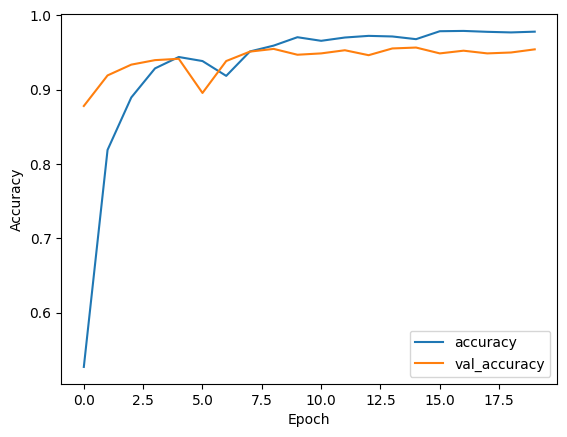

52/52 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.9522
Test Accuracy (ANN): 0.9522370100021362


In [14]:
from tensorflow.keras.optimizers import SGD

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_v, y_train_v, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

def sort_indices(sparse_matrix):
    coo_matrix = sparse_matrix.tocoo()
    sorted_indices = np.argsort(coo_matrix.col)
    sorted_data = coo_matrix.data[sorted_indices]
    sorted_row = coo_matrix.row[sorted_indices]
    sorted_col = coo_matrix.col[sorted_indices]
    sorted_matrix = sparse_matrix.__class__((sorted_data, (sorted_row, sorted_col)), shape=coo_matrix.shape)
    return sorted_matrix


X_train_sorted = sort_indices(X_train_temp)
X_val_sorted = sort_indices(X_val)
X_test_sorted = sort_indices(X_test)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_ann.compile(optimizer=SGD(learning_rate=0.5),  # Set learning rate as desired
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ann.fit(X_train_sorted, y_train_temp, epochs=20, batch_size=64, validation_data=(X_val_sorted, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model_ann.evaluate(X_test_sorted, y_test)
print("Test Accuracy (ANN):", test_accuracy)

Epoch 1/50
78/78 [==============================] - 2s 13ms/step - loss: 2.3996 - accuracy: 0.2326 - val_loss: 1.6954 - val_accuracy: 0.6100
Epoch 2/50
78/78 [==============================] - 1s 9ms/step - loss: 1.5436 - accuracy: 0.5362 - val_loss: 0.8619 - val_accuracy: 0.8470
Epoch 3/50
78/78 [==============================] - 1s 9ms/step - loss: 0.9538 - accuracy: 0.7293 - val_loss: 0.4663 - val_accuracy: 0.9117
Epoch 4/50
78/78 [==============================] - 1s 10ms/step - loss: 0.6176 - accuracy: 0.8299 - val_loss: 0.3152 - val_accuracy: 0.9353
Epoch 5/50
78/78 [==============================] - 1s 9ms/step - loss: 0.4332 - accuracy: 0.8807 - val_loss: 0.2578 - val_accuracy: 0.9359
Epoch 6/50
78/78 [==============================] - 1s 9ms/step - loss: 0.3160 - accuracy: 0.9145 - val_loss: 0.2167 - val_accuracy: 0.9462
Epoch 7/50
78/78 [==============================] - 1s 10ms/step - loss: 0.2742 - accuracy: 0.9325 - val_loss: 0.2016 - val_accuracy: 0.9468
Epoch 8/50
78/78 

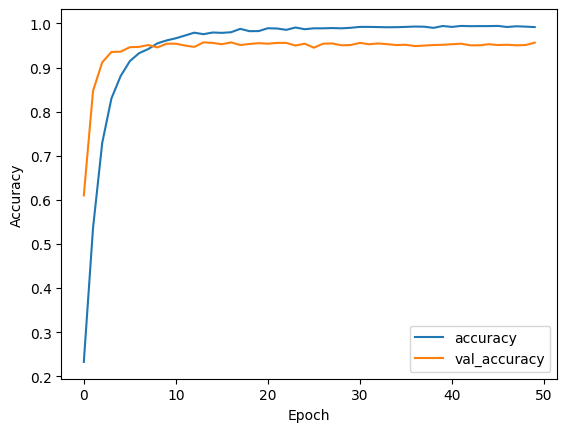

52/52 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9559
Test Accuracy (ANN): 0.9558645486831665


In [15]:
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_train_v, y_train_v, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

def sort_indices(sparse_matrix):
    coo_matrix = sparse_matrix.tocoo()
    sorted_indices = np.argsort(coo_matrix.col)
    sorted_data = coo_matrix.data[sorted_indices]
    sorted_row = coo_matrix.row[sorted_indices]
    sorted_col = coo_matrix.col[sorted_indices]
    sorted_matrix = sparse_matrix.__class__((sorted_data, (sorted_row, sorted_col)), shape=coo_matrix.shape)
    return sorted_matrix

X_train_sorted = sort_indices(X_train_temp)
X_val_sorted = sort_indices(X_val)
X_test_sorted = sort_indices(X_test)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_v.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_ann.compile(optimizer=Adagrad(learning_rate=0.07),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ann.fit(X_train_sorted, y_train_temp, epochs=50, batch_size=64, validation_data=(X_val_sorted, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model_ann.evaluate(X_test_sorted, y_test)
print("Test Accuracy (ANN):", test_accuracy)
